<a href="https://colab.research.google.com/github/chukwuebuka35/HNG-INTERSHIP7/blob/master/CYCLIST_PROJECT2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# BACKGROUNG

In 2016, Cyclistic launched a successful bike-share offering. Since then, the program has grown to a fleet of 5,824 bicycles that
are geotracked and locked into a network of 692 stations across Chicago. The bikes can be unlocked from one station and
returned to any other station in the system anytime.

Until now, Cyclistic’s marketing strategy relied on building general awareness and appealing to broad consumer segments.
One approach that helped make these things possible was the flexibility of its pricing plans: single-ride passes, full-day passes,
and annual memberships. Customers who purchase single-ride or full-day passes are referred to as casual riders. Customers
who purchase annual memberships are Cyclistic members.
Cyclistic’s finance analysts have concluded that annual members are much more profitable than casual riders. Although the
pricing flexibility helps Cyclistic attract more customers and that converting casual members to annual members will be more feasible rather than trying to onboard entirely new annual member customers.

## OBJECTIVE
The objective of this study is to find the effective  marketing strategies to convert casual riders into annual members

This analysis intend to solve this problem by answering below question;
1. How do annual members and casual riders use the cyclist services differently?

## CHALLENGES FACED DURING ANALYSIS
1. Data was too large to be analysed on google sheet/Excel sheet.

#Tools for the analysis
1. Python was used all through for data cleaning, processing and visualization

# DATA SOURCE
The data used is a public data made available by Motivate International Inc. The data can be found <a href="https://divvy-tripdata.s3.amazonaws.com/index.html"> here </a>, The data is a 12 months bike ride data from January - December 2021



In [1]:
# Import all modules needed for the analysis
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import calendar
import numpy as np 

In [2]:
# load the 12 months  data

jan_2021 = pd.read_csv("/content/drive/MyDrive/New folder/202101-divvy-tripdata.csv")
feb_2021 = pd.read_csv("/content/drive/MyDrive/New folder/202102-divvy-tripdata.csv")
march_2021 = pd.read_csv("/content/drive/MyDrive/New folder/202103-divvy-tripdata.csv")
april_2021 = pd.read_csv("/content/drive/MyDrive/New folder/202104-divvy-tripdata.csv")
may_2021 = pd.read_csv("/content/drive/MyDrive/New folder/202105-divvy-tripdata.csv")
june_2021 = pd.read_csv("/content/drive/MyDrive/New folder/202106-divvy-tripdata.csv")
july_2021 = pd.read_csv("/content/drive/MyDrive/New folder/202107-divvy-tripdata.csv")
aug_2021 = pd.read_csv("/content/drive/MyDrive/New folder/202108-divvy-tripdata.csv")
sep_2021 = pd.read_csv("/content/drive/MyDrive/New folder/202109-divvy-tripdata.csv")
oct_2021 = pd.read_csv("/content/drive/MyDrive/New folder/202110-divvy-tripdata.csv")
nov_2021 = pd.read_csv("/content/drive/MyDrive/New folder/202111-divvy-tripdata.csv")
dec_2021 = pd.read_csv("/content/drive/MyDrive/New folder/202112-divvy-tripdata.csv")



In [3]:
# merge the 12 months data
data = pd.concat([jan_2021, feb_2021, march_2021, april_2021, may_2021, 
                  june_2021, july_2021, aug_2021, sep_2021, oct_2021, nov_2021,
                  dec_2021])

In [4]:
#View the data
data.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
0,E19E6F1B8D4C42ED,electric_bike,2021-01-23 16:14:19,2021-01-23 16:24:44,California Ave & Cortez St,17660,NaN,NaN,41.900341,-87.696743,41.89,-87.72,member
1,DC88F20C2C55F27F,electric_bike,2021-01-27 18:43:08,2021-01-27 18:47:12,California Ave & Cortez St,17660,NaN,NaN,41.900333,-87.696707,41.90,-87.69,member
2,EC45C94683FE3F27,electric_bike,2021-01-21 22:35:54,2021-01-21 22:37:14,California Ave & Cortez St,17660,NaN,NaN,41.900313,-87.696643,41.90,-87.70,member
3,4FA453A75AE377DB,electric_bike,2021-01-07 13:31:13,2021-01-07 13:42:55,California Ave & Cortez St,17660,NaN,NaN,41.900399,-87.696662,41.92,-87.69,member
4,BE5E8EB4E7263A0B,electric_bike,2021-01-23 02:24:02,2021-01-23 02:24:45,California Ave & Cortez St,17660,NaN,NaN,41.900326,-87.696697,41.90,-87.70,casual


In [5]:
#Check for missing values
data.isna().sum()

ride_id                    0
rideable_type              0
started_at                 0
ended_at                   0
start_station_name    690809
start_station_id      690806
end_station_name      739170
end_station_id        739170
start_lat                  0
start_lng                  0
end_lat                 4771
end_lng                 4771
member_casual              0
dtype: int64

In [6]:
# Convert date columns to datetime format
data["started_at"] = pd.to_datetime(data["started_at"])
data["ended_at"] = pd.to_datetime(data["ended_at"])


In [7]:
# Extract the day of the week (0=Monday, 1=Tuesday, etc.)
data["day_of_week"] = data["started_at"].dt.dayofweek

# get the name of the weekdays and name of month by using the day_name() and month_name(method from calender, after importing the calender module
data["day_of_week"] = data["started_at"].dt.day_name()
data["month"] = data["started_at"].dt.month_name()

data = data.sort_values(by='day_of_week')

data.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,day_of_week,month
142751,4BC0906ACFBACFEF,classic_bike,2021-07-30 10:05:12,2021-07-30 11:33:05,Lakefront Trail & Bryn Mawr Ave,KA1504000152,Lakefront Trail & Bryn Mawr Ave,KA1504000152,41.984037,-87.652310,41.984037,-87.652310,casual,Friday,July
280457,DE684A23098085A2,classic_bike,2021-06-11 19:50:48,2021-06-11 20:01:38,Sheffield Ave & Waveland Ave,TA1307000126,Sheffield Ave & Wrightwood Ave,TA1309000023,41.949399,-87.654529,41.928712,-87.653833,casual,Friday,June
135882,FF7E8BC28CF510AF,classic_bike,2021-10-15 12:10:02,2021-10-15 12:15:54,Lake Park Ave & 56th St,TA1309000063,Kimbark Ave & 53rd St,TA1309000037,41.793242,-87.587782,41.799568,-87.594747,casual,Friday,October
135880,6ACAD6990CBFCD43,classic_bike,2021-10-01 12:12:58,2021-10-01 12:20:42,Lake Park Ave & 56th St,TA1309000063,Kimbark Ave & 53rd St,TA1309000037,41.793242,-87.587782,41.799568,-87.594747,casual,Friday,October
135877,DC830E01AF64668E,electric_bike,2021-10-15 20:12:55,2021-10-15 20:15:28,Clark St & Touhy Ave,RP-007,Greenview Ave & Jarvis Ave,520,42.012567,-87.674297,42.016011,-87.668556,casual,Friday,October


In [8]:
# calculate each ride duration
data["ride_duration"] = data["ended_at"] - data["started_at"]
data.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,day_of_week,month,ride_duration
142751,4BC0906ACFBACFEF,classic_bike,2021-07-30 10:05:12,2021-07-30 11:33:05,Lakefront Trail & Bryn Mawr Ave,KA1504000152,Lakefront Trail & Bryn Mawr Ave,KA1504000152,41.984037,-87.652310,41.984037,-87.652310,casual,Friday,July,0 days 01:27:53
280457,DE684A23098085A2,classic_bike,2021-06-11 19:50:48,2021-06-11 20:01:38,Sheffield Ave & Waveland Ave,TA1307000126,Sheffield Ave & Wrightwood Ave,TA1309000023,41.949399,-87.654529,41.928712,-87.653833,casual,Friday,June,0 days 00:10:50
135882,FF7E8BC28CF510AF,classic_bike,2021-10-15 12:10:02,2021-10-15 12:15:54,Lake Park Ave & 56th St,TA1309000063,Kimbark Ave & 53rd St,TA1309000037,41.793242,-87.587782,41.799568,-87.594747,casual,Friday,October,0 days 00:05:52
135880,6ACAD6990CBFCD43,classic_bike,2021-10-01 12:12:58,2021-10-01 12:20:42,Lake Park Ave & 56th St,TA1309000063,Kimbark Ave & 53rd St,TA1309000037,41.793242,-87.587782,41.799568,-87.594747,casual,Friday,October,0 days 00:07:44
135877,DC830E01AF64668E,electric_bike,2021-10-15 20:12:55,2021-10-15 20:15:28,Clark St & Touhy Ave,RP-007,Greenview Ave & Jarvis Ave,520,42.012567,-87.674297,42.016011,-87.668556,casual,Friday,October,0 days 00:02:33


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5595063 entries, 142751 to 323454
Data columns (total 16 columns):
 #   Column              Dtype          
---  ------              -----          
 0   ride_id             object         
 1   rideable_type       object         
 2   started_at          datetime64[ns] 
 3   ended_at            datetime64[ns] 
 4   start_station_name  object         
 5   start_station_id    object         
 6   end_station_name    object         
 7   end_station_id      object         
 8   start_lat           float64        
 9   start_lng           float64        
 10  end_lat             float64        
 11  end_lng             float64        
 12  member_casual       object         
 13  day_of_week         object         
 14  month               object         
 15  ride_duration       timedelta64[ns]
dtypes: datetime64[ns](2), float64(4), object(9), timedelta64[ns](1)
memory usage: 725.7+ MB


In [10]:
 # Check for rows with invalide ride_duration (negative ride duration) and drop them
#invalide_riede_duration = data[["ride_duration"] < "0 days"]
data.drop(data[data["ride_duration"] < "0 days"].index, inplace=True)

In [11]:
data.shape

(5593819, 16)

In [12]:
data.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,day_of_week,month,ride_duration
142751,4BC0906ACFBACFEF,classic_bike,2021-07-30 10:05:12,2021-07-30 11:33:05,Lakefront Trail & Bryn Mawr Ave,KA1504000152,Lakefront Trail & Bryn Mawr Ave,KA1504000152,41.984037,-87.652310,41.984037,-87.652310,casual,Friday,July,0 days 01:27:53
280457,DE684A23098085A2,classic_bike,2021-06-11 19:50:48,2021-06-11 20:01:38,Sheffield Ave & Waveland Ave,TA1307000126,Sheffield Ave & Wrightwood Ave,TA1309000023,41.949399,-87.654529,41.928712,-87.653833,casual,Friday,June,0 days 00:10:50
135882,FF7E8BC28CF510AF,classic_bike,2021-10-15 12:10:02,2021-10-15 12:15:54,Lake Park Ave & 56th St,TA1309000063,Kimbark Ave & 53rd St,TA1309000037,41.793242,-87.587782,41.799568,-87.594747,casual,Friday,October,0 days 00:05:52
135880,6ACAD6990CBFCD43,classic_bike,2021-10-01 12:12:58,2021-10-01 12:20:42,Lake Park Ave & 56th St,TA1309000063,Kimbark Ave & 53rd St,TA1309000037,41.793242,-87.587782,41.799568,-87.594747,casual,Friday,October,0 days 00:07:44
135877,DC830E01AF64668E,electric_bike,2021-10-15 20:12:55,2021-10-15 20:15:28,Clark St & Touhy Ave,RP-007,Greenview Ave & Jarvis Ave,520,42.012567,-87.674297,42.016011,-87.668556,casual,Friday,October,0 days 00:02:33


In [13]:
# Reconfirm all invalid ride_duration has been removed
invalide_riede_duration = data[data["ride_duration"] < "0 days"]
invalide_riede_duration

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,day_of_week,month,ride_duration


In [14]:
# Convert duration of each ride to seconds and store in a new column as ride_length
data['ride_length'] = data['ride_duration'].apply(lambda x: x.total_seconds())
#['day'] = data['ride_duration'].apply(lambda x: x.days)

# view tha data to ensure correctness of code
data.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,day_of_week,month,ride_duration,ride_length
142751,4BC0906ACFBACFEF,classic_bike,2021-07-30 10:05:12,2021-07-30 11:33:05,Lakefront Trail & Bryn Mawr Ave,KA1504000152,Lakefront Trail & Bryn Mawr Ave,KA1504000152,41.984037,-87.652310,41.984037,-87.652310,casual,Friday,July,0 days 01:27:53,5273.0
280457,DE684A23098085A2,classic_bike,2021-06-11 19:50:48,2021-06-11 20:01:38,Sheffield Ave & Waveland Ave,TA1307000126,Sheffield Ave & Wrightwood Ave,TA1309000023,41.949399,-87.654529,41.928712,-87.653833,casual,Friday,June,0 days 00:10:50,650.0
135882,FF7E8BC28CF510AF,classic_bike,2021-10-15 12:10:02,2021-10-15 12:15:54,Lake Park Ave & 56th St,TA1309000063,Kimbark Ave & 53rd St,TA1309000037,41.793242,-87.587782,41.799568,-87.594747,casual,Friday,October,0 days 00:05:52,352.0
135880,6ACAD6990CBFCD43,classic_bike,2021-10-01 12:12:58,2021-10-01 12:20:42,Lake Park Ave & 56th St,TA1309000063,Kimbark Ave & 53rd St,TA1309000037,41.793242,-87.587782,41.799568,-87.594747,casual,Friday,October,0 days 00:07:44,464.0
135877,DC830E01AF64668E,electric_bike,2021-10-15 20:12:55,2021-10-15 20:15:28,Clark St & Touhy Ave,RP-007,Greenview Ave & Jarvis Ave,520,42.012567,-87.674297,42.016011,-87.668556,casual,Friday,October,0 days 00:02:33,153.0


In [15]:
# Remove columns not relevant for the analysis
data.drop(["ride_id", "start_station_id", "end_station_name", "end_station_id", 
            "start_lat", "start_lng", "end_lat", "end_lng", "start_station_name"], axis = 1, inplace=True)
data.head()

,rideable_type,started_at,ended_at,member_casual,day_of_week,month,ride_duration,ride_length
142751,classic_bike,2021-07-30 10:05:12,2021-07-30 11:33:05,casual,Friday,July,0 days 01:27:53,5273.0
280457,classic_bike,2021-06-11 19:50:48,2021-06-11 20:01:38,casual,Friday,June,0 days 00:10:50,650.0
135882,classic_bike,2021-10-15 12:10:02,2021-10-15 12:15:54,casual,Friday,October,0 days 00:05:52,352.0
135880,classic_bike,2021-10-01 12:12:58,2021-10-01 12:20:42,casual,Friday,October,0 days 00:07:44,464.0
135877,electric_bike,2021-10-15 20:12:55,2021-10-15 20:15:28,casual,Friday,October,0 days 00:02:33,153.0


In [16]:
data.groupby(["month", "member_casual"]).agg(avg_ride_length=("ride_length", "mean"))

avg_ride_length
month     member_casual                 
April     casual             2281.419145
          member              881.359044
August    casual             1727.273275
          member              846.110572
December  casual             1409.724339
          member              660.294209
February  casual             2962.716556
          member             1081.486421
January   casual             1541.257605
          member              772.351549
July      casual             1967.517743
          member              854.360705
June      casual             2227.396916
          member              880.668334
March     casual             2289.611344
          member              838.293255
May       casual             2293.854796
          member              878.285043
November  casual             1388.050589
          member              678.571240
October   casual             1720.507695
          member              750.120631
September casual             1669.010799
          member              824.135761

In [17]:
month = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
member_data = data.loc[data["member_casual"] == "member"]
member_monthly_avg_ride_length = member_data.groupby("month").agg(avg_ride_length=("ride_length", "mean")).reindex(month)
member_monthly_avg_ride_length

,avg_ride_length
month,
January,772.351549
February,1081.486421
March,838.293255
April,881.359044
May,878.285043
June,880.668334
July,854.360705
August,846.110572
September,824.135761


In [18]:
casual_data = data.loc[data["member_casual"] == "casual"]
casual_monthly_avg_ride_length = casual_data.groupby("month").agg(avg_ride_length=("ride_length", "mean")).reindex(month)
casual_monthly_avg_ride_length

,avg_ride_length
month,
January,1541.257605
February,2962.716556
March,2289.611344
April,2281.419145
May,2293.854796
June,2227.396916
July,1967.517743
August,1727.273275
September,1669.010799


Text(0, 0.5, 'Average Ride Length')

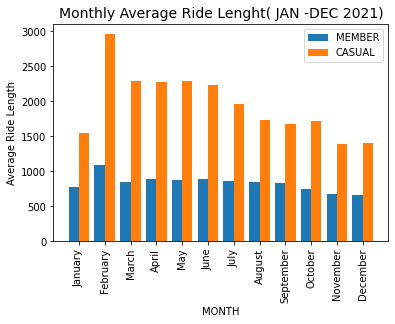

In [19]:
  # Plot visuals showing comparison of average monthly ride lenght by each menber category 
w = 0.4 
x = np.arange(len(member_monthly_avg_ride_length.index))
fig, ax = plt.subplots()
# Plot the first bar chart
p1 = ax.bar(x - w/2, member_monthly_avg_ride_length['avg_ride_length'], width=w, label='MEMBER')
p2 = ax.bar(x + w/2, casual_monthly_avg_ride_length['avg_ride_length'], width=w, label='CASUAL')
ax.set_xticks(x)

ax.set_xticklabels(member_monthly_avg_ride_length.index, rotation=90)
# Add a legend
ax.legend()
plt.title('Monthly Average Ride Lenght( JAN -DEC 2021)', fontsize=14)
plt.xlabel('MONTH')
plt.ylabel('Average Ride Length')

In [20]:
  # Get the daily average ride_length for annual member category
week_day = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
member_data1 = data.loc[data["member_casual"] == "member"]
member_daily_avg_ride_length = member_data.groupby("day_of_week").agg(avg_ride_length=("ride_length", "mean")).reindex(week_day)
member_daily_avg_ride_length

,avg_ride_length
day_of_week,
Monday,794.873807
Tuesday,767.258011
Wednesday,769.151869
Thursday,766.573559
Friday,799.518815
Saturday,915.838992
Sunday,939.514876


In [21]:
# Get the daily average ride_length for casual member category
casual_data1 = data.loc[data["member_casual"] == "casual"]
casual_daily_avg_ride_length = casual_data.groupby("day_of_week").agg(avg_ride_length=("ride_length", "mean")).reindex(week_day)
casual_daily_avg_ride_length

,avg_ride_length
day_of_week,
Monday,1912.640336
Tuesday,1678.323891
Wednesday,1659.464768
Thursday,1662.286086
Friday,1820.981847
Saturday,2082.431774
Sunday,2254.084949


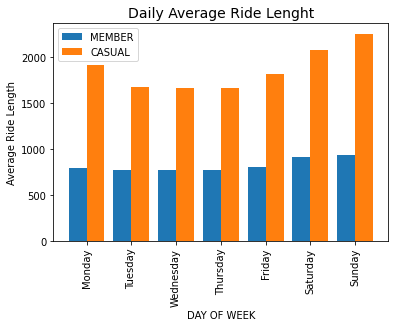

In [22]:
# Plot visuals showing comparison of average daily ride lenght by each menber category 
w = 0.4
x = np.arange(len(member_daily_avg_ride_length.index))
fig, ax = plt.subplots()
# Plot the first bar chart
p1 = ax.bar(x - w/2, member_daily_avg_ride_length['avg_ride_length'], width=w, label='MEMBER')
p2 = ax.bar(x + w/2, casual_daily_avg_ride_length['avg_ride_length'], width=w, label='CASUAL')
ax.set_xticks(x)

ax.set_xticklabels(member_daily_avg_ride_length.index, rotation=90)
# Add a legend
ax.legend()
plt.title('Daily Average Ride Lenght', fontsize=14)
plt.xlabel('DAY OF WEEK')
plt.ylabel('Average Ride Length')
plt.show()

In [23]:
# Get the daily total ride_length for casual member category
casual_data1 = data.loc[data["member_casual"] == "casual"]
casual_daily_total_ride_length = casual_data.groupby("day_of_week").agg(total_ride_length=("ride_length", "sum")).reindex(week_day)
casual_daily_total_ride_length

,total_ride_length
day_of_week,
Monday,5.476214e+08
Tuesday,4.604247e+08
Wednesday,4.628397e+08
Thursday,4.754271e+08
Friday,6.628629e+08
Saturday,1.161741e+09
Sunday,1.084208e+09


In [25]:
# Get the daily total ride_length for annual member category
week_day = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
member_data1 = data.loc[data["member_casual"] == "member"]
member_daily_total_ride_length = member_data.groupby("day_of_week").agg(total_ride_length=("ride_length", "sum")).reindex(week_day)
member_daily_total_ride_length

,total_ride_length
day_of_week,
Monday,330766068.0
Tuesday,357101827.0
Wednesday,366922361.0
Thursday,346053535.0
Friday,356845235.0
Saturday,396528061.0
Sunday,353297053.0


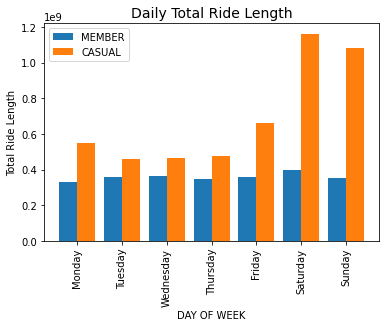

In [27]:
# Plot visuals showing comparison of average daily ride lenght by each menber category 
w = 0.4
x = np.arange(len(member_daily_total_ride_length.index))
fig, ax = plt.subplots()
# Plot the first bar chart
p1 = ax.bar(x - w/2, member_daily_total_ride_length['total_ride_length'], width=w, label='MEMBER')
p2 = ax.bar(x + w/2, casual_daily_total_ride_length['total_ride_length'], width=w, label='CASUAL')
ax.set_xticks(x)
ax.set_xticklabels(member_daily_total_ride_length.index, rotation=90)
# Add a legend
ax.legend()
plt.title('Daily Total Ride Length', fontsize=14)
plt.xlabel('DAY OF WEEK')
plt.ylabel('Total Ride Length')
plt.show()

In [ ]:
member_data2 = data.loc[data["member_casual"] == "member"]
member_ride_type = member_data2.groupby("rideable_type").agg(ride_type=("rideable_type", "count"))
member_ride_type

,ride_type
rideable_type,
classic_bike,1983906
docked_bike,1
electric_bike,1081454


# New Section

In [ ]:
casual_data2 = data.loc[data["member_casual"] == "casual"]
casual_ride_type = casual_data2.groupby("rideable_type").agg(ride_type=("rideable_type", "count"))
casual_ride_type

,ride_type
rideable_type,
classic_bike,1266383
docked_bike,312284
electric_bike,949791


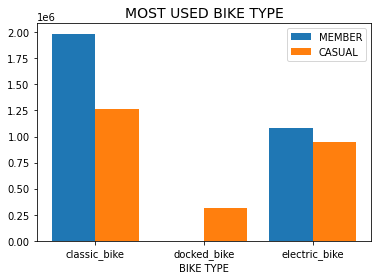

In [ ]:
# Plot visuals showing comparison of most used bike type by each member category 
w = 0.4
x = np.arange(len(member_ride_type.index))
fig, ax = plt.subplots()
# Plot the first bar chart
p1 = ax.bar(x - w/2, member_ride_type['ride_type'], width=w, label='MEMBER')
p2 = ax.bar(x + w/2, casual_ride_type['ride_type'], width=w, label='CASUAL')
ax.set_xticks(x)
ax.set_xticklabels(member_ride_type.index)
# Add a legend
ax.legend()
plt.title('MOST USED BIKE TYPE', fontsize=14)
plt.xlabel('BIKE TYPE')
#plt.ylabel('')
plt.show()

In [ ]:
# Get the prefered week_day of ride for casual members
casual_prefered_day_of_ride = casual_data2["day_of_week"].mode()
casual_prefered_day_of_ride


0    Saturday
dtype: object

In [ ]:
# Get the prefered day of ride for annual members
member_prefered_day_of_ride = member_data2["day_of_week"].mode()
member_prefered_day_of_ride

0    Wednesday
dtype: object

# OBSERVATIONS
Below observations were made by the study
1. Casual members use the cyclist services more between February and June, this might be seasonal as a result of weather condition during this time, the annual members have mostly uniformed ride duration month by month.

2. The casual members tends to use the cyclist services more on weekends between Saturdays and Sunndays probably for leisure/excercise, the annual members have mostly uniformed ride duration with Wednesday being the most.


3. Both casual and annual members prefers mostly the classic bike type, closely followed by th electric bike type.



# RECOMMENDATIONS

1. The marketing team should embark on promotionals for the casual riders between February and June, this should also usher in new enticing plans for the casual riders, this is to make them to further increase their ride duration.

2. The single and full-day access payment plans for the casual members should be sustained while offering them discount/incentives to switch to annual payment plan.

3. More of the classic and electric bike types should be made available to accomodate casual members that will potentially become annual members.

4. There should be incentives to encourage more weekend rides by the casual members.